In [4]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

In [2]:
def read_data(input_file, index) : 
    input_data = np.loadtxt(input_file, delimiter=',')
    
    #문자열을 날짜 형식으로 변환하는 람다 함수
    to_date = lambda x, y : str(int(x)) + "-" + str(int(y))
    
    #시작 날짜 #input_data[:,0:2] == [[1900,1], [1900,2], [1900,3], [1900,4], [1900,5], ...]
    #현재 주어진 text 파일은 0열과 1열에 시작 날짜 정보를 포함하며, 종료 날짜는 제공하지 않는다.
    start = to_date(input_data[0,0], input_data[0,1])
    
    #종료 날짜는 시작 날짜 +1개월로 설정한다.
    if input_data[-1, 1] == 12 : 
        year = input_data[-1, 0] + 1
        month = 1
    else : 
        year = input_data[-1, 0]
        month = input_data[-1, 1] + 1
    end = to_date(year, month)
    
    
    #월별 빈도 정보 인덱스
    date_indices = pd.date_range(start, end, freq="M") #시작 날짜부터 끝 날짜까지 "M":월 간격으로 생성한다. cf) "D", "H", "5D" ...

    output = pd.Series(input_data[:, index], index=date_indices)
    
    return output

In [5]:
data = np.loadtxt("data_1D.txt", delimiter=",")

In [6]:
data

array([[  1.80000000e+03,   1.00000000e+00,   3.00000000e-02],
       [  1.80000000e+03,   2.00000000e+00,   2.00000000e-02],
       [  1.80000000e+03,   3.00000000e+00,   1.90000000e-01],
       ..., 
       [  2.01600000e+03,   1.00000000e+01,   6.13000000e+00],
       [  2.01600000e+03,   1.10000000e+01,   6.05000000e+00],
       [  2.01600000e+03,   1.20000000e+01,   6.17000000e+00]])

In [7]:
X = np.column_stack([data[:,2]])

In [10]:
X

array([[ 0.03],
       [ 0.02],
       [ 0.19],
       ..., 
       [ 6.13],
       [ 6.05],
       [ 6.17]])

In [11]:
#Gaussian HMM 
num_components = 5
hmm = GaussianHMM(n_components=num_components, covariance_type="diag", n_iter=1000)

In [12]:
#HMM learning
print("\nTraining the Hidden Markov Model...")
hmm.fit(X)


Training the Hidden Markov Model...


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=5, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [13]:
#HMM status
print("\nMeans and variances:")
for i in range(hmm.n_components) : 
    print("\nHidden state", i+1)
    print("Mean =", round(hmm.means_[i][0], 2))
    print("Variance =", round(np.diag(hmm.covars_[i])[0], 2))


Means and variances:

Hidden state 1
Mean = 4.6
Variance = 0.25

Hidden state 2
Mean = 2.6
Variance = 0.26

Hidden state 3
Mean = 8.6
Variance = 0.26

Hidden state 4
Mean = 0.6
Variance = 0.25

Hidden state 5
Mean = 6.59
Variance = 0.25


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function sample_gaussian is deprecated; The function sample_gaussian is deprecated in 0.18 and will be removed in 0.20. Use numpy.random.multivariate_normal instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function sample_gaussian is deprecated; The function sample_gaussian is deprecated in 0.18 and will be removed in 0.20. Use numpy.random.multivariate_normal instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function sample_gaussian is deprecated; The function sample_gaussian is deprecated in 0.18 and will be removed in 0.20. Use numpy.random.multivariate_normal instead.
  warning

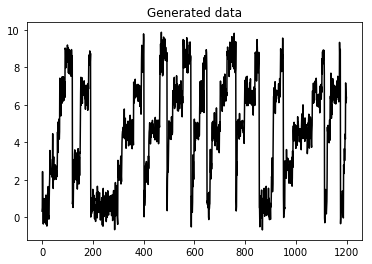

In [16]:
#creating data using HMM model
num_samples = 1200
generated_data, _ = hmm.sample(num_samples)

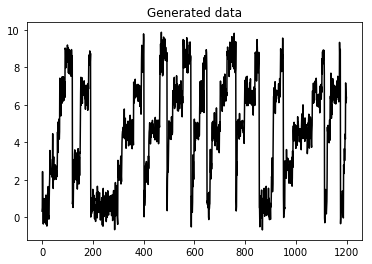

In [17]:
plt.plot(np.arange(num_samples), generated_data[:, 0], c="black")
plt.title("Generated data")
plt.show()